# Deep Learning Course - LAB 1

## Intro to PyTorch

PyTorch (PT) is a Python (and C++) library for Machine Learning (ML) particularly suited for Neural Networks and their applications.

Its great selection of built-in modules, models, functions, CUDA capability, tensor arithmetic support and automatic differentiation functionality make it one of the most used scientific libraries for Deep Learning.

Note: for this series of labs, we advise to install Python >= 3.7

### Installing PyTorch

We advise to install PyTorch following the directions given in its [home page](https://pytorch.org/get-started/locally/). Just typing `pip install torch` may not be the correct action as you have to take into account the compatibility with `cuda`. If you have `cuda` installed, you can find your version by typing `nvcc --version` in a terminal (Linux/iOS). 

If you're using Windows, we first suggest first to install Anaconda and then install PyTorch from the `anaconda prompt` software via `conda` (preferably) or `pip`.

If you're using Google Colab, all the libraries needed to follow this lecture should be pre-installed there.

We see now how to operate on Colab.

### For Colab users

Google Colab is a handy tool that we suggest you use for this course---especially if your laptop does not support CUDA or has limited hardware capabilities. Anyway, note that **we'll try to avoid GPU code as much as possible**.

Essentially, Colab renders available to you a virtual machine with a limited hardware capability and disk where you can execute your code inside a given time window. You can even ask for a GPU (if you use it too much you'll need to start waiting a lot before it's available though).

#### Your (maybe) first Colab commands

Colab Jupyter-style notebook interface with a few tweaks.

For instance, you may run (some) bash command from here prepending `!` to your code.

In [1]:
!ls

01-intro-to-pt.ipynb	       data
01-intro-to-ptQuestions.ipynb  img
02-sgd-training.ipynb	       scripts
03-regularization.ipynb        t-6ca1b698-615e-4cc1-90cc-70103d3feee9.ipynb
04-optimizers.ipynb


In [2]:
!pwd

/media/john/Yerel Disk/1-Doğan/1-Akademik/Yüksek Lisans/1-Dersler/4.Yarıyıl/Deep Learning/00-labs-gits/DSSC_DL_2021/labs


In [ ]:
!git clone https://github.com/mnzluca/IntroToAI

This makes it very easy to operate your virtual machine without the need for a terminal. 

#### File transfer on Colab

One of the most intricate action in Colab is file transfer. Since your files reside on the virtual machine, there're two main ways to operate file transfer on Colab.

* `files.download()` / `.upload()`

In [ ]:
from google.colab import files
files.upload()

In [ ]:
files.download("sample_data/README.md")

Although it may be much more handy to connect your Google Drive to Colab. Here is a snippet that lets you do this.

In [ ]:
from google.colab import drive

folder_mount = '/content/drive' # Your Drive will be mounted on top of this path

drive.mount(folder_mount)

### Dive into PyTorch - connections with NumPy

Like NumPy, PyTorch provides its own multidimensional array class, called `Tensor`. `Tensor`s are essentially the equivalent of NumPy `ndarray`s.
If we wish to operate a very superficial comparison between `Tensor` and `ndarray`, we can say that:
* `Tensor` draws a lot of methods from NumPy, although it's missing some (see [this GitHub issue](if you're interested))
* `Tensor` is more OO than `ndarray` and solves some inconsistencies within NumPy
* `Tensor` has CUDA support

In [1]:
import torch
import numpy as np

# create custom Tensor and ndarray
x = torch.Tensor([[1,5,4],[3,2,1]])
y = np.array([[1,5,4],[3,2,1]])

def pretty_print(obj, title=None):
    if title is not None:
        print(title)
    print(obj)
    print("\n")

pretty_print(x, "x")
pretty_print(y, "y")

x
tensor([[1., 5., 4.],
        [3., 2., 1.]])


y
[[1 5 4]
 [3 2 1]]




What are the types of these objs?

In [4]:
x.dtype, y.dtype

(torch.float32, dtype('int64'))

`torch` already thinks with Machine Learning in mind as the `Tensor` is implicitly converted to `dtype float32`, while NumPy makes no such assumption.

For more info on `Tensor` data types, please check the beginning of [this page](https://pytorch.org/docs/stable/tensors.html).

As in NumPy, we can call the `.shape` attribute to get the shape of the structures. Moreover, `Tensor`s have also the `.size()` method which is analogous to `.shape`.

In [5]:
x.shape, y.shape, x.size()

(torch.Size([2, 3]), (2, 3), torch.Size([2, 3]))

Notice how a `Tensor` shape is **not** a tuple.

We can also create a random `Tensor` analogously to NumPy.

A `2 × 3 × 3` `Tensor` is the same as saying "2 3 × 3 matrices", or a "cubic matrix"

![](img/tensors.jpg)

In [6]:
x = torch.rand([2, 3, 3])
x

tensor([[[0.7947, 0.6180, 0.9952],
         [0.5958, 0.8308, 0.7534],
         [0.1022, 0.1978, 0.0786]],

        [[0.4115, 0.7898, 0.4092],
         [0.3919, 0.0289, 0.5060],
         [0.7690, 0.8075, 0.4893]]])

In [7]:
x.shape

torch.Size([2, 3, 3])

In [8]:
y = np.random.rand(2, 3, 3)
y

array([[[0.40172421, 0.92708001, 0.82985548],
        [0.81851389, 0.40257245, 0.85209763],
        [0.90209297, 0.96569205, 0.32106906]],

       [[0.28004271, 0.30870658, 0.55492051],
        [0.83111431, 0.84739985, 0.91583406],
        [0.62639351, 0.73819564, 0.81964727]]])

In [9]:
y.shape

(2, 3, 3)

We can get the total number of elements in a `Tensor` via the `numel()` method

In [10]:
x.numel()

18

We can get the memory occupied by each element of a `Tensor` via `element_size()`

In [11]:
x.element_size()

4

Hence, we can quickly calculate the size of the `Tensor` within the RAM

In [12]:
x.numel() * x.element_size()

72

#### Slicing a `Tensor`

You can slice a `Tensor` (*i.e.*, extract a substructure of a `Tensor`) as in NumPy using the square brackets:

In [13]:
# extract first element (i.e., matrix) of first dimension
pretty_print(x[0], "Slice first element (x[0])")

# extract a specific element
pretty_print(x[1,2,0], "Slice element at (1, 2, 0) (x[1, 2, 0])")

# extract first element of second dimension (":" means all the elements of the given dim)
pretty_print(x[:, 0], "Slice first element of second dim (x[:, 0])")

# note that it is equivalent to
pretty_print(x[:, 0, :], "As above (x[:, 0] equivalent to x[:, 0, :])")

# extract range of dimensions (first and second element of third dim) 
pretty_print(x[:, :, 0:2], "Slice first and second el of third dim (x[:, :, 0:2])")

# note that it is equivalent to (i.e., you can also pass list for slicing, as opposed to Py vanilla lists/tuples)
pretty_print(x[:, :, (0, 1)], "As above (x[:, :, 0:2] equivalent to x[:, :, (0, 1)])")

Slice first element (x[0])
tensor([[0.7947, 0.6180, 0.9952],
        [0.5958, 0.8308, 0.7534],
        [0.1022, 0.1978, 0.0786]])


Slice element at (1, 2, 0) (x[1, 2, 0])
tensor(0.7690)


Slice first element of second dim (x[:, 0])
tensor([[0.7947, 0.6180, 0.9952],
        [0.4115, 0.7898, 0.4092]])


As above (x[:, 0] equivalent to x[:, 0, :])
tensor([[0.7947, 0.6180, 0.9952],
        [0.4115, 0.7898, 0.4092]])


Slice first and second el of third dim (x[:, :, 0:2])
tensor([[[0.7947, 0.6180],
         [0.5958, 0.8308],
         [0.1022, 0.1978]],

        [[0.4115, 0.7898],
         [0.3919, 0.0289],
         [0.7690, 0.8075]]])


As above (x[:, :, 0:2] equivalent to x[:, :, (0, 1)])
tensor([[[0.7947, 0.6180],
         [0.5958, 0.8308],
         [0.1022, 0.1978]],

        [[0.4115, 0.7898],
         [0.3919, 0.0289],
         [0.7690, 0.8075]]])




In Py, you can also slice any list by interval via the "double colon" notation `::` (`from`:`to - 1`:`step`). Note that `::3` means "take all elements of the object by step of 3 starting from 0 until the list ends".

In [14]:
torch.range(0, 10)[0:7:3]

<ipython-input-14-6b675b646afa>:1: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  torch.range(0, 10)[0:7:3]


tensor([0., 3., 6.])

#### `Tensor` supports linear algebra

In [15]:
z1 = torch.rand([4, 5])
print("z1")
print("shape", z1.shape)
print(z1)

# transposition
z2 = z1.T

print("\nz2")
print("shape", z2.shape)
print(z2)

z1
shape torch.Size([4, 5])
tensor([[0.5537, 0.4866, 0.1822, 0.6292, 0.1361],
        [0.6086, 0.4965, 0.1856, 0.3130, 0.1898],
        [0.2394, 0.6607, 0.6476, 0.3270, 0.9754],
        [0.0933, 0.2789, 0.5533, 0.0650, 0.4754]])

z2
shape torch.Size([5, 4])
tensor([[0.5537, 0.6086, 0.2394, 0.0933],
        [0.4866, 0.4965, 0.6607, 0.2789],
        [0.1822, 0.1856, 0.6476, 0.5533],
        [0.6292, 0.3130, 0.3270, 0.0650],
        [0.1361, 0.1898, 0.9754, 0.4754]])


In [16]:
# matrix multiplication
pretty_print(z1 @ z2, "Matrix multiplication: with '@'")

# equivalent to
pretty_print(torch.matmul(z1, z2), "Matrix multiplication: with torch.matmul")

# and also
pretty_print(z1.matmul(z2), "Matrix multiplication: with Tensor.matmul")

Matrix multiplication: with '@'
tensor([[0.9909, 0.8351, 0.9105, 0.3937],
        [0.8351, 0.7854, 0.8815, 0.4085],
        [0.9105, 0.8815, 1.9715, 1.0499],
        [0.3937, 0.4085, 1.0499, 0.6229]])


Matrix multiplication: with torch.matmul
tensor([[0.9909, 0.8351, 0.9105, 0.3937],
        [0.8351, 0.7854, 0.8815, 0.4085],
        [0.9105, 0.8815, 1.9715, 1.0499],
        [0.3937, 0.4085, 1.0499, 0.6229]])


Matrix multiplication: with Tensor.matmul
tensor([[0.9909, 0.8351, 0.9105, 0.3937],
        [0.8351, 0.7854, 0.8815, 0.4085],
        [0.9105, 0.8815, 1.9715, 1.0499],
        [0.3937, 0.4085, 1.0499, 0.6229]])




Note that `@` identifies the matrix product.

Don't mistake `@` and `*` as the latter is the Hadamard (element-by-element) product!

#### Question: is it possible to do scalar product between vectors?

Note: the scalar product is also called [inner or dot or projection product](https://en.wikipedia.org/wiki/Dot_product).

Like we have seen with matrices, we can proceed as follows for vectors:

In [20]:
vec1 = torch.rand((5,))
vec2 = torch.rand((5,))

pretty_print(vec1, "vec1")
pretty_print(vec2, "vec2")

pretty_print(vec1 @ vec2, "I can use '@' even if the two vectors aren't conformable (i.e. both colum or row vectors")

pretty_print(vec1.unsqueeze(0) @ vec2.unsqueeze(-1), "This is the 'classical' inner product between row and column vector -- Notice the dim of the output")

pretty_print(torch.matmul(vec1, vec2), "Notice that the same result can be achieved via the `matmul` method of torch -- as we have seen, it's the inner product")

pretty_print(torch.dot(vec1, vec2), "...and also via torch.dot")

vec1
tensor([0.0517, 0.9706, 0.9280, 0.9003, 0.9078])


vec2
tensor([0.2240, 0.2746, 0.1598, 0.1357, 0.5763])


I can use '@' even if the two vectors aren't conformable (i.e. both colum or row vectors
tensor(1.0718)


This is the 'classical' inner product between row and column vector -- Notice the dim of the output
tensor([[1.0718]])


Notice that the same result can be achieved via the `matmul` method of torch -- as we have seen, it's the inner product
tensor(1.0718)


...and also via torch.dot
tensor(1.0718)




In [17]:
# dot works only with vectors!
torch.dot(torch.rand((3,4)), torch.rand(4,3))

# do this instead!
torch.matmul(torch.rand((3,4)), torch.rand(4,3))

RuntimeError: 1D tensors expected, got 2D, 2D tensors at /pytorch/aten/src/TH/generic/THTensorEvenMoreMath.cpp:83

On to the tutorial, let us see more examples of operations on tensors and conformability between tensors....

In [18]:
z1 * z2 # this gives an Exception

RuntimeError: The size of tensor a (5) must match the size of tensor b (4) at non-singleton dimension 1

In [19]:
z1 * z1

tensor([[0.3066, 0.2368, 0.0332, 0.3958, 0.0185],
        [0.3704, 0.2465, 0.0345, 0.0980, 0.0360],
        [0.0573, 0.4366, 0.4193, 0.1069, 0.9513],
        [0.0087, 0.0778, 0.3062, 0.0042, 0.2260]])

Generally, the "regular" arithmetic operators for Python act as element-wise operators in `Tensor`s (as in `ndarrays`)

In [20]:
z1 ** 2 # Equivalent to above

tensor([[0.3066, 0.2368, 0.0332, 0.3958, 0.0185],
        [0.3704, 0.2465, 0.0345, 0.0980, 0.0360],
        [0.0573, 0.4366, 0.4193, 0.1069, 0.9513],
        [0.0087, 0.0778, 0.3062, 0.0042, 0.2260]])

In [21]:
z3 = torch.Tensor([[1,2,3,4,7],[0.2,2,4,5,3],[-1,3,-4,2,2],[1,1,1,1,2]])
pretty_print(z1 % z3, "z1 % z3 (remainder of integer division)")
pretty_print(z3 // z1, "z3 // z1 (integer division)") # integer division
z3 /= z1
pretty_print(z3, "in-place tensor division (z3 /= z1)")

z1 % z3 (remainder of integer division)
tensor([[ 0.5537,  0.4866,  0.1822,  0.6292,  0.1361],
        [ 0.0086,  0.4965,  0.1856,  0.3130,  0.1898],
        [-0.7606,  0.6607, -3.3524,  0.3270,  0.9754],
        [ 0.0933,  0.2789,  0.5533,  0.0650,  0.4754]])


z3 // z1 (integer division)
tensor([[ 1.,  4., 16.,  6., 51.],
        [ 0.,  4., 21., 15., 15.],
        [-4.,  4., -6.,  6.,  2.],
        [10.,  3.,  1., 15.,  4.]])


in-place tensor division (z3 /= z1)
tensor([[ 1.8060,  4.1104, 16.4699,  6.3577, 51.4439],
        [ 0.3286,  4.0281, 21.5487, 15.9743, 15.8040],
        [-4.1763,  4.5403, -6.1769,  6.1156,  2.0505],
        [10.7195,  3.5859,  1.8072, 15.3846,  4.2068]])




As for `ndarrays`, `Tensor`s arithmetic operations support **broadcasting**. Roughly speaking, when two `Tensor`s have different shapes and a binary+ operator is applied to them, PT will try to find a way to make these objects "compatible" for the operation. 

Of course, broadcasting is not always possible, but as a rule of thumb, if some dimensions of a `Tensor` are one and the other dimensions are the same, broadcasting works.

In [22]:
small_vector_5 = torch.Tensor([1,2,3,5,2]) # this is treated as a row vector (1 x 5 matrix)
print("small_vector_5:", small_vector_5, "; Shape:", small_vector_5.shape, "\n")

pretty_print(z1 / small_vector_5, "Broadcasting: dividing matrix by row vector")

small_vector_4 = torch.Tensor([4,2,3,1])
small_vector_4 = small_vector_4.unsqueeze(-1) # this operation "transposes" the vector into a column vector (4 x 1 matrix)
print("small_vector_4:\n", small_vector_4, "\nShape:", small_vector_4.shape, "\n")

pretty_print(z1 / small_vector_4, "Broadcasting: dividing matrix by column vector")

small_vector_5: tensor([1., 2., 3., 5., 2.]) ; Shape: torch.Size([5]) 

Broadcasting: dividing matrix by row vector
tensor([[0.5537, 0.2433, 0.0607, 0.1258, 0.0680],
        [0.6086, 0.2483, 0.0619, 0.0626, 0.0949],
        [0.2394, 0.3304, 0.2159, 0.0654, 0.4877],
        [0.0933, 0.1394, 0.1844, 0.0130, 0.2377]])


small_vector_4:
 tensor([[4.],
        [2.],
        [3.],
        [1.]]) 
Shape: torch.Size([4, 1]) 

Broadcasting: dividing matrix by column vector
tensor([[0.1384, 0.1216, 0.0455, 0.1573, 0.0340],
        [0.3043, 0.2483, 0.0928, 0.1565, 0.0949],
        [0.0798, 0.2202, 0.2159, 0.1090, 0.3251],
        [0.0933, 0.2789, 0.5533, 0.0650, 0.4754]])




In [23]:
torch.Tensor([1,2,3]) == torch.Tensor([[1,2,3]]) # single-dim Tensors are also row vectors

tensor([[True, True, True]])

#### Reshaping and permuting

Sometimes it may be necessary to reshape the tensors to apply some specific operators.

Take the example of RGB images: they can be seen as `3 x h x w` tensors, where `h` is the height and `w` the width.

![](img/image_tensor.png)

Sometimes, it may be necessary to "flatten" the three matrices into vectors, thus obtaining a `3 x hw` tensor.

In [24]:
image = torch.load("data/img.pt")
image.shape

torch.Size([3, 243, 880])

This flattening may be achieved via the `reshape` method.

In [25]:
image_reshaped = image.reshape(3, 243*880)
pretty_print(image_reshaped.shape, "shape of image_reshaped")

shape of image_reshaped
torch.Size([3, 213840])




We can alternatively use the `view` method...

In [26]:
image_view = image.view(3, 243*880)
pretty_print(image_view.shape, "shape of image_view")

shape of image_view
torch.Size([3, 213840])




**Q**: what is the difference between `reshape` and `view`?

* `view` does not copy the object. It's just a _view_ of the original tensor.
* `reshape` sometimes copy the object, sometimes it does not and resorts to `view` (thanks to Emanuele for the tip :) )

### Addition discussed during lecture

**Example of *inconsistency* in the behavior between `reshape` and `view`** (provided by Andrea Gasparin):


In [27]:
z = torch.tensor([[1,2,3],[4,5,6]])
y = z.t()
y.size()
y.view(6) # I wish to reshape the matrix z in a vector of size 6 - this gives an error

RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

In [28]:
z = torch.tensor([[1,2,3],[4,5,6]])
y = z.t()
y.size()
yy = y.reshape(6) # this instead is safe
print(yy)

tensor([1, 4, 2, 5, 3, 6])


The reason for the error in the first cell lies in the way PyTorch stores the tensor in memory. A detailed, yet easy-to-grasp explanation is given [here](https://discuss.pytorch.org/t/contigious-vs-non-contigious-tensor/30107/2) by Piotr Bialecki, one of the top PyTorch developers.

Let's go more in-depth in the memory management:

In [29]:
# the memory of yy is different from the one of y and z
yy[2] = 100
print(yy)
print(y)
print(z)

tensor([  1,   4, 100,   5,   3,   6])
tensor([[1, 4],
        [2, 5],
        [3, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [71]:
# but the memory of y and z is the same
y[0,1] = 100
print(y)
print(z)

tensor([[  1, 100],
        [  2,   5],
        [  3,   6]])
tensor([[  1,   2,   3],
        [100,   5,   6]])


In [30]:
# also using .T we get the same result
zz = y.T
zz[0,0] = -4
print(zz)
print(y)

tensor([[-4,  2,  3],
        [ 4,  5,  6]])
tensor([[-4,  4],
        [ 2,  5],
        [ 3,  6]])


In [31]:
# if we want a deep copy, we need to call .clone() to copy the tensor (NB: .copy() for ndarrays)
zz = y.T.clone()
zz[1,1] = 36
print(zz)
print("the update we made on zz does not propagate on to y")
print(y)

tensor([[-4,  2,  3],
        [ 4, 36,  6]])
the update we made on zz does not propagate on to y
tensor([[-4,  4],
        [ 2,  5],
        [ 3,  6]])


## End of addition

Some libraries encode images as `h x w x 3` tensors instead of `3 x h x w`.

To convert between these two format, one may be tempted to `reshape` or `view` the tensor: in the end, they share the number of elements.



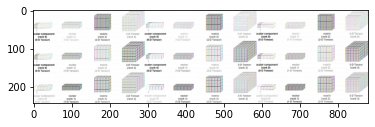

In [32]:
from matplotlib import pyplot as plt

image2 = image.reshape(243, 880, 3)

plt.imshow(image2)
plt.show()

That does not seem to work though: reshape does not change the order of the elements within the memory.

In order to do so, we need to use `permute`, which changes shape **and** the order of the elements.
We need to pass the new order of the dimensions to it.

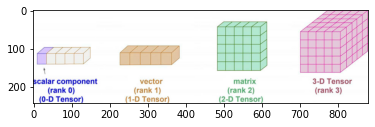

In [33]:
image3 = image.permute(1,2,0) # 1,2,0 --> old dim1 goes first, old dim2 goes second, dim0 goes last
# can also do image.permute(-2,-1,0) -- works with negative indices as well
plt.imshow(image3)
plt.show()

#### More linear algebra

In [34]:
z3_norm = z3.norm()
pretty_print(z3_norm, "Tensor norm")
pretty_print(np.linalg.norm(y), "ndarray norm") # notice how torch is more OO

Tensor norm
tensor(66.8369)


ndarray norm
10.295630140987




Notice how methods reducing `Tensor`s to scalars still return singleton `Tensor`s. (be wary of this feature when scripting something in PT)

To "disentangle" the scalar from a `Tensor` use the `.item()` method.

In [35]:
z3_norm.item()

66.83686828613281

Note that, as for NumPy, PT supports `Tensor`s operator on a subset of its dimensions.

For example, given a `3x4x4 Tensor`, we might want to calculate the norm of each of the three `4x4` matrices composing it. We must hence specify to the `norm` method the dimensions on which we want it to operate the reduction:

In [36]:
z4 = torch.rand((3,4,4))
pretty_print(z4, "z4")
pretty_print(z4.norm(dim=(1,2)), "Norm of the three matrices composing z4 -- z4.norm(dim=(1,2))")

z4
tensor([[[0.6639, 0.2459, 0.8854, 0.0478],
         [0.9875, 0.6965, 0.5117, 0.6280],
         [0.4825, 0.6259, 0.4807, 0.6762],
         [0.2132, 0.2739, 0.8832, 0.8959]],

        [[0.6534, 0.1256, 0.2840, 0.3490],
         [0.7598, 0.5656, 0.1902, 0.8269],
         [0.5043, 0.4103, 0.3168, 0.8155],
         [0.8401, 0.6723, 0.4635, 0.6810]],

        [[0.0257, 0.7672, 0.7811, 0.3124],
         [0.2070, 0.9308, 0.4145, 0.8994],
         [0.1585, 0.9641, 0.1504, 0.1289],
         [0.2139, 0.2875, 0.3471, 0.2806]]])


Norm of the three matrices composing z4 -- z4.norm(dim=(1,2))
tensor([2.5337, 2.2992, 2.1233])




As expected, the result is a `1x3 Tensor`, showing the norm of each of the matrices.

We can notice this behaviour in other `Tensor` operator applying a reduction, for example `.sum()` and `.prod()` (sum/product of the elements within the tensor).

By specifying `z4.prod(dim=1)`, we **fix** the second dimension and loop through the other dimensions, applying the product for all of the resulting tensor slices. Let's see a code for clarity.

In [37]:
# 1. let us create an empty vector with the shape of the dimension we did NOT specify in `prod` above:
product_fix_dim = torch.empty([z4.shape[0], z4.shape[2]])

# 2. we loop through these dimensions to get the result of `z4.prod(dim=1)`
for i in range(product_fix_dim.shape[0]):
    for j in range(product_fix_dim.shape[1]):
        # the result for the (i,j) position is the product of the corresponding sub-tensor z4[i, :, j]
        # (we consider the whole of the 2nd dim, loop through the 1st and 3rd)
        product_fix_dim[i, j] = z4[i, :, j].prod()

pretty_print(product_fix_dim, "The result of our fancy loop ...")
pretty_print(z4.prod(dim=1), "... is the same as z4.prod(dim=1)")

The result of our fancy loop ...
tensor([[6.7443e-02, 2.9365e-02, 1.9233e-01, 1.8173e-02],
        [2.1031e-01, 1.9596e-02, 7.9311e-03, 1.6026e-01],
        [1.8060e-04, 1.9792e-01, 1.6898e-02, 1.0162e-02]])


... is the same as z4.prod(dim=1)
tensor([[6.7443e-02, 2.9365e-02, 1.9233e-01, 1.8173e-02],
        [2.1031e-01, 1.9596e-02, 7.9311e-03, 1.6026e-01],
        [1.8060e-04, 1.9792e-01, 1.6898e-02, 1.0162e-02]])




Analogously, we may apply the same reasoning to the `sum()` method:

`z4.sum(dim=0)`:
* we fix the first dim
* and loop through the other dims

In [38]:
pretty_print(z4.sum(dim=0), "z4.sum(dim=0) -- Element-wise sum of the three matrices composing the tensor -- is a 4x4 matrix")

z4.sum(dim=0) -- Element-wise sum of the three matrices composing the tensor -- is a 4x4 matrix
tensor([[1.3430, 1.1387, 1.9504, 0.7092],
        [1.9543, 2.1929, 1.1164, 2.3542],
        [1.1453, 2.0003, 0.9479, 1.6206],
        [1.2671, 1.2336, 1.6938, 1.8575]])




this is analogous to

In [85]:
z4[0] + z4[1] + z4[2]

tensor([[1.6146, 1.1477, 0.8214, 1.3207],
        [1.8905, 0.9253, 0.9401, 1.3078],
        [0.6341, 1.8341, 1.7913, 2.3652],
        [0.6130, 1.0129, 2.6255, 1.2807]])

#### Seamless conversion from NumPy to PT

In [39]:
y_numpy = np.random.rand(3,5)
y_torch = torch.from_numpy(y_numpy)
pretty_print(y_torch, "y converted to torch.Tensor")

x = torch.rand(6,4)
x_numpy = x.numpy()
pretty_print(x_numpy, "x converted to numpy.ndarray")

# Note that NumPy implicitly converts Tensor to ndarray whenever it can; the same doesn't happen for PT
pretty_print(np.linalg.norm(x), "Example of implicit conversion Tensor → ndarray (np.linalg.norm(x) where x is torch.tensor)")

torch.norm(x_numpy) # this does not work

y converted to torch.Tensor
tensor([[0.2670, 0.2227, 0.8265, 0.8041, 0.4340],
        [0.7897, 0.0973, 0.4841, 0.7456, 0.4817],
        [0.0891, 0.7672, 0.3907, 0.7498, 0.3908]], dtype=torch.float64)


x converted to numpy.ndarray
[[0.11107183 0.11561757 0.5909646  0.25624835]
 [0.5460571  0.7187388  0.02875841 0.5466096 ]
 [0.35177433 0.7528149  0.03498071 0.75812787]
 [0.6033244  0.10996467 0.3243327  0.5690395 ]
 [0.06332016 0.11540228 0.78017247 0.7821988 ]
 [0.16234249 0.9921368  0.80461305 0.4488371 ]]


Example of implicit conversion Tensor → ndarray (np.linalg.norm(x) where x is torch.tensor)
2.5930495




AttributeError: 'numpy.ndarray' object has no attribute 'dim'

#### Stochastic functionalities

We can render the (pseudo)random number generator deterministic by calling `torch.manual_seed(integer)`.

This works for both CPU and CUDA RNG calls.

In [40]:
torch.manual_seed(123456)
print("...from now on our random tensor should be the same...")

...from now on our random tensor should be the same...


In [41]:
pretty_print(torch.randperm(10), "(randperm) Random permutation of 0:10")

pretty_print(torch.rand_like(z1), "(rand_like) Create random vector with the same shape of z_1")

pretty_print(torch.randint(10, (3, 3)), "(randint) Like rand, but with integers up to 10")

pretty_print(torch.normal(0, 1, (3, 3)), "(normal) Sampling a 3x3 iid scalars from N(0,1)")

pretty_print(torch.normal(torch.Tensor([[1,2,3],[4,5,6],[0,0,0]]), torch.Tensor([[1,0.5,0.9],[0.5,1,0.1],[3,4,1]])), "Sampling from 9 normals with different means and std into a (3x3) Tensor")

(randperm) Random permutation of 0:10
tensor([5, 2, 4, 9, 1, 7, 3, 6, 0, 8])


(rand_like) Create random vector with the same shape of z_1
tensor([[0.4954, 0.0728, 0.9644, 0.5524, 0.0060],
        [0.1053, 0.2431, 0.5141, 0.2926, 0.0147],
        [0.3049, 0.4911, 0.6739, 0.6872, 0.9038],
        [0.1368, 0.2698, 0.1289, 0.3020, 0.0194]])


(randint) Like rand, but with integers up to 10
tensor([[7, 6, 2],
        [9, 0, 3],
        [0, 4, 4]])


(normal) Sampling a 3x3 iid scalars from N(0,1)
tensor([[-0.4107, -1.5861, -0.4778],
        [ 1.0268,  1.2428,  0.4147],
        [-0.6491,  0.0784, -0.7173]])


Sampling from 9 normals with different means and std into a (3x3) Tensor
tensor([[ 1.1070,  1.9439,  2.3757],
        [ 3.6595,  5.8618,  5.9344],
        [ 5.0647, -1.0821, -0.0713]])




### Using GPUs

All `Torch.Tensor` methods support GPU computation via built-in CUDA wrappers.

Just transfer the involved `Tensor`s to CUDA and let the magic happen :)

In [42]:
# check if cuda is available on this machine
torch.cuda.is_available()

has_cuda_gpu = torch.cuda.is_available()

In [43]:
print(has_cuda_gpu)

True


In [44]:
if has_cuda_gpu:
    dim = 10000
    large_cpu_matrix = torch.rand((dim, dim)) 
    large_gpu_matrix = large_cpu_matrix.to("cuda") # Can also specify "cuda:gpu_id" if multiple GPUs
    # alternatively, you may also call large_cpu_matrix.cuda() or large_cpu_matrix.cuda(0)
else:
    print("Sorry, this part of the notebook is inaccessible since it seems you don't have a CUDA-capable GPU on your device :/")

In [45]:
pretty_print(large_cpu_matrix.device, "Device of large_cpu_matrix")
pretty_print(large_gpu_matrix.device, "Device of large_gpu_matrix")
pretty_print(large_gpu_matrix, "If a tensor is not on CPU, the device will also be printed if you print the tensor itself")

Device of large_cpu_matrix
cpu


Device of large_gpu_matrix
cuda:0


If a tensor is not on CPU, the device will also be printed if you print the tensor itself
tensor([[0.0327, 0.0109, 0.2665,  ..., 0.5804, 0.4661, 0.7026],
        [0.2794, 0.1043, 0.9303,  ..., 0.4007, 0.1453, 0.0920],
        [0.6367, 0.0349, 0.3394,  ..., 0.3768, 0.1542, 0.9925],
        ...,
        [0.7185, 0.1975, 0.5782,  ..., 0.7769, 0.4387, 0.5765],
        [0.5272, 0.3289, 0.8843,  ..., 0.5120, 0.0360, 0.9804],
        [0.3870, 0.1210, 0.8344,  ..., 0.3171, 0.6310, 0.5509]],
       device='cuda:0')




In [46]:
if has_cuda_gpu:
    import timeit

    # NOTE: please fix this number w.r.t. your GPU and CPU
    repetitions = 100

    print("Norm of large cpu matrix. Time:", timeit.timeit("large_cpu_matrix.norm()", number=repetitions, globals=locals()))
    print("Norm of large gpu matrix. Time:", timeit.timeit("large_gpu_matrix.norm()", number=repetitions, globals=locals()))
else:
    print("Sorry, this part of the notebook is inaccessible since it seems you don't have a CUDA-capable GPU on your device :/")

Norm of large cpu matrix. Time: 3.9111730979984713
Norm of large gpu matrix. Time: 0.006078607999370433


Captain obvious: Use `tensor.cpu()` or `tensor.to("cpu")` to move a tensor to your CPU

### Building easy ML models

By using all the pieces we've seen till now, we can build our first ML model using PyTorch: a linear regressor, whose model is

`y = XW + b`

which can also be simplified as

`y = XW`

if we incorporate the bias `b` inside `W` and add to the `X` a column of ones to the right.

We'll first create our data. The `X`s are the 0:9 range plus some iid random noise, while the `y` is just the 0:9 range

In [117]:
# Note: torch.range(0, 9) (I see now it is deprecated) returns all numbers from 0 to 9
# torch.arange(0, 9) instead returns all numbers from 0 to 8.
# remember to fix the indices if you wish to substitute `range` with `arange`
x1 = torch.range(0, 9).unsqueeze(-1)
x2 = torch.range(0, 9).unsqueeze(-1)
x3 = torch.range(0, 9).unsqueeze(-1)
x0 = torch.ones([10]).unsqueeze(-1)
# first, concatenate x1, x2, and x3 to form a single matrix X
X = torch.cat((x1, x2, x3), dim=1)
# add small noise to the Xs
eps = torch.normal(0, .3, (10, 3))
X += eps
# concatenate also x0 so we can express the model as y=XW
X = torch.cat((X, x0), dim=1)

y = torch.range(0, 9).unsqueeze(-1)


pretty_print(X, "X (covariates)")
pretty_print(y, "y (response)")

X (covariates)
tensor([[ 0.1601, -0.2486,  0.1524,  1.0000],
        [ 1.2918,  0.8969,  0.8829,  1.0000],
        [ 2.1047,  1.7416,  2.3016,  1.0000],
        [ 2.6001,  3.1881,  3.2888,  1.0000],
        [ 4.3257,  3.8127,  4.2925,  1.0000],
        [ 4.8119,  5.1280,  5.3677,  1.0000],
        [ 5.6085,  5.9021,  6.2773,  1.0000],
        [ 7.2543,  7.4962,  7.1649,  1.0000],
        [ 8.1298,  8.0437,  8.1770,  1.0000],
        [ 9.3342,  9.2586,  8.9170,  1.0000]])


y (response)
tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])


<ipython-input-117-6ef5fba205fd>:4: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  x1 = torch.range(0, 9).unsqueeze(-1)
<ipython-input-117-6ef5fba205fd>:5: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. No

For the case of linear regression, we usually wish to obtain a set of weights minimizing the so called mean square error/loss (MSE), which is the squared difference between the ground truth and the model prediction, summed for each data instance.

We know that the OLS/Max Likelihood esitmator is the one yielding the optimal set of weights in that regard.

In [118]:
W_hat = ((X.T @ X).inverse()) @ X.T @ y # OLS estimator

pretty_print(W_hat, "W (optimal weights/coefficients [first 3] and bias/intercept [last one])")

W (optimal weights/coefficients [first 3] and bias/intercept [last one])
tensor([[ 0.2463],
        [ 0.2481],
        [ 0.4927],
        [-0.0530]])




We can evaluate our model on the mean square loss

In [119]:
def mean_square_loss(y, y_hat):
    return (((y - y_hat).norm())**2).item() / y.shape[0]

Let's apply it to our data.

First we need to obtain the predictions, then we can evaluate the MSE.

In [120]:
y_hat = X @ W_hat
pretty_print(y_hat, "Predictions (y_hat)")

pretty_print(mean_square_loss(y, y_hat), "Loss (MSE)")

Predictions (y_hat)
tensor([[-1.5161e-04],
        [ 9.2276e-01],
        [ 2.0316e+00],
        [ 2.9989e+00],
        [ 4.0735e+00],
        [ 5.0493e+00],
        [ 5.8858e+00],
        [ 7.1240e+00],
        [ 7.9742e+00],
        [ 8.9368e+00]])


Loss (MSE)
0.004786702618002891




#### Using PT built-ins

We will now be exploring the second chunk of PT functionalities, namely the built-in structures and routines supporting the creation of ML models.

We can create the same model we have seen before using PT built-in structures, so we start to see them right away.

Usually, a PT model is a `class` inheriting from `torch.nn.Module`. Inside this class, we'll define two methods:
* the constructor (`__init__`) in which we define the building blocks of our model as class variables (later during our lectures we'll see more "elegant" methods to build models architectures)
* the `forward` method, which specifies how the data fed into the model needs to be processed in order to produce the output

Note for those who already know something about NNs: we don't need to define `backward` methods since we're constructing our model with built-in PT building blocks. PT automatically creates a `backward` routine based upon the `forward` method.

Our model only has one building block (layer) which is a `Linear` layer.
We need to specify the size of the input (i.e. the coefficients `W` of our linear regressor) and the size of the output (i.e. how many scalars it produces) of the layer. We additionaly request our layer to have a bias term `b` (which acts as the intercept of the hyperplane we saw before).

The `Linear` layer processes its input as `XW + b`, which is exactly the (first) equation of the linear regressor we saw before.



In [121]:
class LinearRegressor(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.regressor = torch.nn.Linear(in_features=3, out_features=1, bias=True)

    def forward(self, X):
        return self.regressor(X)

We can create an instance of our model and inspect the current parameters by using the `state_dict` method, which prints the building blocks of our model and their current parameters. Note that `state_dict` is essentially a dictonary indexed by the names of the building blocks which we defined inside the constructor (plus some additional identifiers if a layer has more than one set of parameters).

In [122]:
lin_reg = LinearRegressor()

for param_name, param in lin_reg.state_dict().items():
    print(param_name, param)

regressor.weight tensor([[ 0.4050, -0.3095,  0.1907]])
regressor.bias tensor([-0.4650])


We can update the parameters via `state_dict` and re-using the same OLS estimates we obtained before.

Note that PT is thought of for Deep Learning: it does not have (I think) the routines to solve different ML problems.

Next time, we'll see how we can unleash PT's gradient-based iterative training routines and compare the results w.r.t. the OLS estimators.

In [123]:
state_dict = lin_reg.state_dict()
state_dict["regressor.weight"] = W_hat[:3].T
state_dict["regressor.bias"] = W_hat[3]
lin_reg.load_state_dict(state_dict)

<All keys matched successfully>

In [124]:
# Check if it worked
for param_name, param in lin_reg.state_dict().items():
    print(param_name, param)

regressor.weight tensor([[0.2463, 0.2481, 0.4927]])
regressor.bias tensor([-0.0530])


The `forward` method gets implicitly called by passing the data to our model's instance `lin_reg`:

In [125]:
X_lin_reg = X[:,:3]
predictions_lin_reg = lin_reg(X_lin_reg)
pretty_print(predictions_lin_reg, "Predictions of torch class")

Predictions of torch class
tensor([[-1.5161e-04],
        [ 9.2276e-01],
        [ 2.0316e+00],
        [ 2.9989e+00],
        [ 4.0735e+00],
        [ 5.0493e+00],
        [ 5.8858e+00],
        [ 7.1240e+00],
        [ 7.9742e+00],
        [ 8.9368e+00]], grad_fn=<AddmmBackward>)




The predictions are the same as before

In [126]:
pretty_print(y_hat, "Predictions of linear model")

Predictions of linear model
tensor([[-1.5161e-04],
        [ 9.2276e-01],
        [ 2.0316e+00],
        [ 2.9989e+00],
        [ 4.0735e+00],
        [ 5.0493e+00],
        [ 5.8858e+00],
        [ 7.1240e+00],
        [ 7.9742e+00],
        [ 8.9368e+00]])




### Adding non-linearity

One of the staples of DL is that the relationship between the `X`s and the predictions is **non-linear**.

The non-linearity is obtain by applying a non-linear function (called *activation function*) after each linear layer.

We can complicate just a little bit our linear model to create a **logistic regressor**:

`y = logistic(XW + b)`,

where `logistic(z) = exp(z) / (1 + exp(z))`

The logistic function has different names:
* in statistics, it's usually called *inverse logit* as well
* in DL and mathematics, it's called *sigmoid function* due to its "S" shape

Hystorically, the sigmoid was between the first activation functions used in NNs.

![](img/sigmoid.png)

Logistic regression is usually used as a **binary classification model** instead of a regression model.
In this setting, we suppose we have two destination classes to which we assign values 0 and 1: `y ∈ {0, 1}`.
Since the codomain of the sigmoid is `[0,1]`, we can interpret its output `ŷ` as a probability value, and assign each data to the class 0 if `ŷ <= 0.5`, to the class 1 otherwise.


In [127]:
y = torch.Tensor([0,1,0,0,1,1,1,0,1,1])
pretty_print(y, "y for our classification problem")

y for our classification problem
tensor([0., 1., 0., 0., 1., 1., 1., 0., 1., 1.])




Note that we may also want our y to be a vector of `int`s.
We can convert the `Tensor` type to `int` by calling the method `.long()` or `.int()` of `Tensor`.

As in NumPy, the type of the `Tensor` is found within the `dtype` variable of the given `Tensor`.

In [128]:
y = y.long()
pretty_print(y, "y converted to int")
pretty_print(y.dtype, "Data type of y")

y converted to int
tensor([0, 1, 0, 0, 1, 1, 1, 0, 1, 1])


Data type of y
torch.int64




Let us now build our logistic regressor in PT.

We only need one single addition wrt the linear regressor: in the `forward` method, we'll add the sigmoidal non-linearity by calling the `sigmoid` function within the `torch.nn.functional` library.

Note that there also exist some "mirror" alias of these functionals within `torch.nn` (e.g. `torch.nn.Sigmoid`): we'll learn in the following lecture why these aliases are there and how to use them.

In [129]:
class LogisticRegressor(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # no difference wrt linear regressor
        self.regressor = torch.nn.Linear(in_features=3, out_features=1)
    
    def forward(self, X):
        out = self.regressor(X)
        # here we apply the sigmoid fct to the output of regressor
        out = torch.sigmoid(out)
        return out

We can instantiate our logistic regressor and use it to calculate our predictions on the same X as before.

Note that **we're using the initial (random) weights which PT has assigned to the model parameters**.
For our linear regressor, we were able to analytically obtain the OLS value of the parameters.
In the case of logistic regression, there's no MaxLikelihood estimator obtainable in close form and we need to resort to numerical methods to obtain them.
Since the part concerning numerical optimization will be discussed during the next Lab, we will not be training our model (hence results will obviously be sub-par).

In [130]:
log_reg = LogisticRegressor()
y_hat = log_reg(X_lin_reg)
pretty_print(y_hat, "logistic regressor predictions")

logistic regressor predictions
tensor([[0.4001],
        [0.5110],
        [0.4752],
        [0.5698],
        [0.5944],
        [0.6545],
        [0.6737],
        [0.8069],
        [0.7932],
        [0.8629]], grad_fn=<SigmoidBackward>)




There exist many ways to evaluate the performance of the logistic regressor: one of them is **accuracy** (correctly identified units / total number of units).
We can define a function to evaluate accuracy and calculate it on our model and data

In [136]:
def accuracy(y, y_hat):
    # Assign each y_hat to its predicted class
    pred_classes = torch.where(y_hat < .5, torch.tensor([0]), torch.tensor([1])).squeeze().long()
    correct = (pred_classes == y).sum()
    return (correct.item() / y.shape[0])

In [137]:
accuracy(y, y_hat)

0.8

#### Visualizing linear and logistic regression as a computational graph

We now need to convert the equation of the linear and the logistic regression:
* `y = σ(WX + b)`

where `σ` is a generic `ℝ → ℝ` function: sigmoid for logistic regression, identity for linear regression.

![](img/log_reg_graph.jpg)

We organize the input in *nodes* (on the left part) s.t. each node represents one dimension/covariate.
For each data instance, we substitute to each node the corresponding numeric value.
The nodes undergo one or more operations, namely, from left to right:

1. Each node is multiplied by its corresponding weight (a value placed on the edge indicates that the node is multiplied by said value)
2. All the corresponding outputs are summed together

These two operations identify the dot product between vectors `X` and `W`

3. The bias term `b` is added
4. The non-linear function `σ` is applied to the result of this sum
5. Finally, we assign that value to the variable `ŷ`, which is also indicated as a node


### Our first MultiLayer Perceptron (MLP)

The MLP is a family of Artificial NNs in which the input is a vector of size `ℝ^d` and the output is again a vector of size `ℝ^p`, where `p` is determined upon the nature of the problem we wish to solve. Additionally, a MLP is characterized by multiple stages (*layers*) of sequential vector-matrix multiplication and non-linearity (steps 1., 2., 3. above) in which each output of the layer `l-1` acts as input to the layer `l`.

Taking inspiration to the graph of the logistic regression, we can translate all into an image to give sense to these words:

![](img/mlp_graph.jpg)

In NNs, each of the nodes within the graph is called a **neuron**

Neurons are organized in **layers**

In computational graphs, layers are shown from left to right (or bottom to top sometimes), which is the direction of the flow of information inside the NN.

The first layer is called **input layer** and represents the dimensions of our data.

The last layer is called **output layer** and represent the output of our NN.

All the intermediate layers are called **hidden layers**. To be defined MLP, there must be at least one hidden layer inside our model.

If the NN is an MLP, each neuron in a given layer (except for the input) receives information from every neuron of the previous; moreover, each neuron in any layer (except for the output) sends information to every neuron of the next layer. There's no communication between neurons of the same layer (if it happens, we have a **Recursive Neural Network**).

For the sake of brevity, usually in NN computational graphs we drop the blocks `+` and `σ`, the values of weights, and the reference to the bias terms, remaining with a scheme conveying info about
* the number of neurons per layer
* the connectivity of neurons

The graph above becomes:

![](img/mlp_graph_common.jpg)

We can then start programming our simple MLP in PT.

We will suppose that our MLP is for **binary classification**, hence the activation function `τ` is the sigmoid.

In [138]:
class MLP(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(in_features=3, out_features=2)
        self.layer2 = torch.nn.Linear(in_features=2, out_features=1)

    def forward(self, X):
        out = self.layer1(X)
        out = torch.nn.functional.relu(out)
        out = self.layer2(out)
        out = torch.nn.functional.sigmoid(out)
        return out


For the great majority of MLP, it's very hard to get analytical solutions to our sets of weights and biases. We then resort to numerical methods for optimization.

In DL, we normally used gradient-based methods like Stochastic Gradient Descent with *backpropagation* to find approximate solutions.

We'll cover these topics in future lectures. For now, the focus is to build a MLP in PT and perform the *forward pass* (=evaluate the model on a set of data).

We can analyse the structure of our MLP by just printing the model

In [139]:
model = MLP()
model

MLP(
  (layer1): Linear(in_features=3, out_features=2, bias=True)
  (layer2): Linear(in_features=2, out_features=1, bias=True)
)

although we might wanna have additional informations.

There's an additional package, called `torch-summary` which helps us producing more informative and exhaustive model summaries.

In [7]:
import sys
!{sys.executable} -m pip install torch-summary #how to use pip or conda in jupyter notebooks
from torchsummary import summary

In [9]:
summary(model)

NameError: name 'model' is not defined

Let us suppose we wish to build a larger model from the graph below.

![](img/mlp_graph_larger.jpg)

We suppose that

1. The layers have no bias units
2. The activation function for hidden layers is `ReLU`

Moreover, we suppose that this is a classification problem.

As you might recall, when the number of classes is > 2, we encode the problem in such a way that the output layer has a no. of neurons corresponding to the no. of classes. Doing so, we establish a correspondence between output units and classes. The value of the $j$-th neuron represents the **confidence** of the network in assigning a given data instance to the $j$-th class.

Classically, when the network is encoded in such way, the activation function for the final layer is the **softmax** function.
If $C$ is the total number of classes,

$softmax(z_j) = \frac{\exp(z_j)}{\sum_{k=1}^C \exp(z_k)}$

where $j\in \{1,\cdots,C\}$ is one of the classes.

If we repeat this calculation for all $j$s, we end up with $C$ normalized values (i.e., between 0 and 1) which can be interpreted as probability that the network assigns the instance to the corresponding class.

#### Homework (see Moodle for additional info)

1. build the MLP using PT built-ins as above
2. Instantiate and summarise
3. Provide calculation for the exact number of parameters of the MLP (also in the case of bias terms)
4. Calculate the L1 and L2 norm of parameters for the params of each layer

In [2]:
class MLP_New(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(in_features=5, out_features=11,bias=False)
        self.layer2 = torch.nn.Linear(in_features=11, out_features=16,bias=False)
        self.layer3 = torch.nn.Linear(in_features=16, out_features=13,bias=False)
        self.layer4 = torch.nn.Linear(in_features=13, out_features=8,bias=False)
        self.layer5 = torch.nn.Linear(in_features=8, out_features=4,bias=False)

    def forward(self, X):
        out = self.layer1(X)
        out = torch.nn.functional.relu(out)
        out = self.layer2(out)
        out = torch.nn.functional.relu(out)
        out = self.layer3(out)
        out = torch.nn.functional.relu(out)
        out = self.layer4(out)
        out = torch.nn.functional.relu(out)
        out = self.layer5(out)
        out = torch.nn.functional.softmax(out)
        return out

    def getListOfLayers(self):
        return [self.layer1,self.layer2,self.layer3,self.layer4,self.layer5]

    def printNormsOfLayers(self,norm_type):        
        #list_of_layers = self.getListOfLayers()
        print("L{norm_type} norm of layer1 is:".format(norm_type,torch.norm(self.layer1)))

In [3]:
mlp_model = MLP_New()
mlp_model

MLP_New(
  (layer1): Linear(in_features=5, out_features=11, bias=False)
  (layer2): Linear(in_features=11, out_features=16, bias=False)
  (layer3): Linear(in_features=16, out_features=13, bias=False)
  (layer4): Linear(in_features=13, out_features=8, bias=False)
  (layer5): Linear(in_features=8, out_features=4, bias=False)
)

In [10]:
summary(mlp_model)

Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            55
├─Linear: 1-2                            176
├─Linear: 1-3                            208
├─Linear: 1-4                            104
├─Linear: 1-5                            32
Total params: 575
Trainable params: 575
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            55
├─Linear: 1-2                            176
├─Linear: 1-3                            208
├─Linear: 1-4                            104
├─Linear: 1-5                            32
Total params: 575
Trainable params: 575
Non-trainable params: 0

In [11]:
# Below part is calculated by manually, hope it was the purpose of question
print("Number of parameters without bias: ",5*11 + 11*16 + 16*13 + 13*8 + 8*4)
print("Number of parameters with bias: ",5*11 + 11 + 11*16 + 16 + 16*13 + 13 + 13*8 + 8+ 8*4 + 4)

Number of parameters without bias:  575
Number of parameters with bias:  627


In [21]:
model_layers_dict = mlp_model.state_dict()
for layer_name, layer_weigths in model_layers_dict.items():
    print(layer_name, "L1 norm of layer is: ", torch.linalg.norm(layer_weigths,1), "L2 norm of layer is: ", torch.linalg.norm(layer_weigths,2))

layer1.weight L1 norm of layer is:  tensor(2.9284) L2 norm of layer is:  tensor(1.1882)
layer2.weight L1 norm of layer is:  tensor(2.8760) L2 norm of layer is:  tensor(1.0829)
layer3.weight L1 norm of layer is:  tensor(2.3150) L2 norm of layer is:  tensor(0.8825)
layer4.weight L1 norm of layer is:  tensor(1.4397) L2 norm of layer is:  tensor(0.9519)
layer5.weight L1 norm of layer is:  tensor(0.9901) L2 norm of layer is:  tensor(0.7674)
